In [402]:
import numpy as np 
import pandas as pd

# Data visualization using Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer 
from sklearn.impute import SimpleImputer

import math


In [403]:
import warnings
warnings.filterwarnings('ignore')

In [404]:
titanic = pd.read_csv("https://raw.githubusercontent.com/vamsivarma/datasets/master/data_science/pandas/titanic.csv")


In [405]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [406]:
print(titanic.columns)
titanic.info()


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    

In [407]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


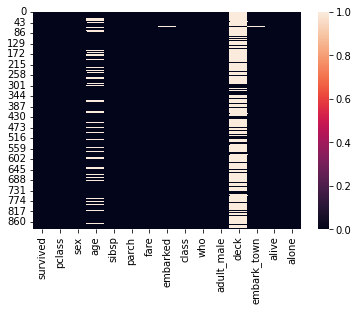

In [408]:
sns.heatmap(titanic.isnull()) 
plt.show()

In [409]:
print(titanic.age.mean())
print(titanic.deck.unique())

29.69911764705882
[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']


In [410]:
unaged = titanic[titanic['age'].isna()==True]
aged = titanic[titanic['age'].isna()==False]

display(unaged.head(5))

age_interpol = titanic['age'].interpolate(method='linear', 
                           limit_direction='forward', 
                           axis=0)
age_interpol.iloc[[5,17,19,26,28]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


5     44.5
17    16.5
19    33.0
26    28.5
28    26.0
Name: age, dtype: float64

In [411]:
fig = go.Figure()
fig.add_trace(go.Line(y=age_interpol[:100], name ='interpoled'))
fig.add_trace(go.Line(y=titanic.age[:100], name ='original'))

fig.update_layout(title="Age")
fig.show()

In [412]:
tmp = pd.get_dummies(titanic)
features = tmp[tmp['age'].isna() == False]
features = features.drop('age', axis=1)
features.head(5)

label = aged['age'] 

agePred = RandomForestRegressor()

agePred.fit(features,label)



RandomForestRegressor()

In [413]:
X_test = tmp[tmp['age'].isna() == True]
X_test = X_test.drop('age', axis=1)

X_test.shape

(177, 30)

In [414]:
# pred0 = agePred.predict(X_test[:1])

def predictAge(row):
  if(math.isnan(row.age) == False):
    return int(row.age)
  
  x = row.drop('age')
  row.age = round(agePred.predict(np.array([x]))[0])
  return row.age

age_predicted = tmp.copy()

display(tmp.head(10))
age_predicted.age = age_predicted.apply(lambda row: predictAge(row), axis=1)

age_predicted.head(10)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38.0,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26.0,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,3,35.0,0,0,8.0500,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
5,0,3,NaN,0,0,8.4583,True,True,0,1,...,0,0,0,0,0,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,True,True,0,1,...,0,0,1,0,0,0,0,1,1,0
7,0,3,2.0,3,1,21.0750,False,False,0,1,...,0,0,0,0,0,0,0,1,1,0
8,1,3,27.0,0,2,11.1333,False,False,1,0,...,0,0,0,0,0,0,0,1,0,1
9,1,2,14.0,1,0,30.0708,False,False,1,0,...,0,0,0,0,0,1,0,0,0,1


,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,0,3,22,1,0,7.2500,True,False,0,1,...,0,0,0,0,0,0,0,1,1,0
1,1,1,38,1,0,71.2833,False,False,1,0,...,1,0,0,0,0,1,0,0,0,1
2,1,3,26,0,0,7.9250,False,True,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35,1,0,53.1000,False,False,1,0,...,1,0,0,0,0,0,0,1,0,1
4,0,3,35,0,0,8.0500,True,True,0,1,...,0,0,0,0,0,0,0,1,1,0
5,0,3,35,0,0,8.4583,True,True,0,1,...,0,0,0,0,0,0,1,0,1,0
6,0,1,54,0,0,51.8625,True,True,0,1,...,0,0,1,0,0,0,0,1,1,0
7,0,3,2,3,1,21.0750,False,False,0,1,...,0,0,0,0,0,0,0,1,1,0
8,1,3,27,0,2,11.1333,False,False,1,0,...,0,0,0,0,0,0,0,1,0,1
9,1,2,14,1,0,30.0708,False,False,1,0,...,0,0,0,0,0,1,0,0,0,1


In [415]:
fig = go.Figure()
fig.add_trace(go.Line(y=age_predicted.age[:100], name ='predicted'))
# fig.add_trace(go.Line(y=age_interpol[:100], name ='interpoled'))
fig.add_trace(go.Line(y=titanic.age[:100], name ='original'))

fig.update_layout(title="Age")
fig.show()


In [416]:
titanic_1 = titanic.copy()
titanic_1.age = age_predicted.age

titanic_1.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,35,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [417]:
tmp = pd.get_dummies(titanic[['sex','alive']], drop_first=True)
tmp.head()

titanic_2 =titanic_1.copy()
titanic_2[['sex','alive']] = tmp
          
titanic_2.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22,1,0,7.2500,S,Third,man,True,NaN,Southampton,0,False
1,1,1,0,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26,0,0,7.9250,S,Third,woman,False,NaN,Southampton,1,True
3,1,1,0,35,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35,0,0,8.0500,S,Third,man,True,NaN,Southampton,0,True


In [418]:

print(titanic_2.deck.unique())
tmp = titanic_1.copy()

features = tmp[tmp['deck'].isna() == False]
features = features.drop('deck', axis=1)
features = pd.get_dummies(features)

# display(features.head(5))

label = tmp[tmp['deck'].isna() == False].deck
# display(label.head(5))

deck_model = RandomForestClassifier()
deck_model.fit(features,label)

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']


RandomForestClassifier()

In [419]:
def predictDeck(row):
  # print(row.deck)
  if(pd.isna(row.deck) == False):
    return row.deck
  
  x = row.drop('deck')
  # x = pd.get_dummies(features)

  row.deck = deck_model.predict(np.array([x]))[0]

  return row.deck

tmp = titanic_1.copy()
deck_predicted = tmp.copy()

# display(tmp.head(10))

deck_predicted = tmp
deck_predicted = deck_predicted.drop('deck', axis=1)
deck_predicted = pd.get_dummies(deck_predicted)

deck_predicted['deck']= tmp.deck

display(deck_predicted.head(5).deck)

deck_predicted.deck=deck_predicted.apply(lambda row: predictDeck(row), axis=1)

deck_predicted.deck.head(5)

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: deck, dtype: object

0    F
1    C
2    E
3    C
4    F
Name: deck, dtype: object

In [420]:
titanic_3 = titanic_2.copy()
titanic_3.deck=deck_predicted.deck
display(titanic_3.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22,1,0,7.2500,S,Third,man,True,F,Southampton,0,False
1,1,1,0,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,1,False
2,1,3,0,26,0,0,7.9250,S,Third,woman,False,E,Southampton,1,True
3,1,1,0,35,1,0,53.1000,S,First,woman,False,C,Southampton,1,False
4,0,3,1,35,0,0,8.0500,S,Third,man,True,F,Southampton,0,True


In [421]:
tmp = pd.get_dummies(titanic_3[['embarked','who','deck','embark_town']],drop_first=False)

titanic_4 = titanic_3.drop(['embarked','who','deck','embark_town'], axis=1)
titanic_5 = titanic_4.join(tmp)

print(titanic_3.columns)
print(titanic_4.columns)
print(titanic_5.columns)

# tmp.head()


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'alive', 'alone'],
      dtype='object')
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'adult_male', 'alive', 'alone', 'embarked_C', 'embarked_Q',
       'embarked_S', 'who_child', 'who_man', 'who_woman', 'deck_A', 'deck_B',
       'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton'],
      dtype='object')


In [422]:
# class_labels = titanic_5['class'].unique()

class_map = [['Third', 3], ['First', 1], ['Second', 2]]

scale_mapper = {"First":1, "Second":2, "Third":3}
titanic_5['class'] =  titanic_5['class'].replace(scale_mapper)

titanic_5['class'].head()

0    3
1    1
2    3
3    1
4    3
Name: class, dtype: int64

In [423]:
titanic_5.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alive,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22,1,0,7.2500,3,True,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,0,38,1,0,71.2833,1,False,1,...,0,0,1,0,0,0,0,1,0,0
2,1,3,0,26,0,0,7.9250,3,False,1,...,0,0,0,0,1,0,0,0,0,1
3,1,1,0,35,1,0,53.1000,1,False,1,...,0,0,1,0,0,0,0,0,0,1
4,0,3,1,35,0,0,8.0500,3,True,0,...,0,0,0,0,0,1,0,0,0,1


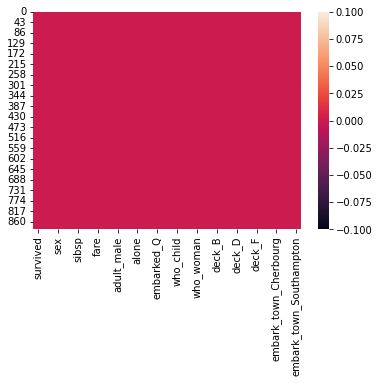

In [424]:
sns.heatmap(titanic_5.isnull())

In [425]:
X = titanic_5.drop('survived', axis=1)
y = titanic_5['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [426]:
# X_train.head(1).to_dict(orient='records')[0]
me = pd.DataFrame({'adult_male': True,
 'age': 39,
 'alive': 1,
 'alone': True,
 'class': 2,
 'deck_A': 1,
 'deck_B': 0,
 'deck_C': 0,
 'deck_D': 0,
 'deck_E': 0,
 'deck_F': 0,
 'deck_G': 0,
 'embark_town_Cherbourg': 0,
 'embark_town_Queenstown': 0,
 'embark_town_Southampton': 1,
 'embarked_C': 0,
 'embarked_Q': 0,
 'embarked_S': 1,
 'fare': 20.0,
 'parch': 0,
 'pclass': 2,
 'sex': 1,
 'sibsp': 0,
 'who_child': 0,
 'who_man': 1,
 'who_woman': 0},index=[len(titanic)+1])

X_test_with_me = X_test.append(me)


In [427]:
display(X_test_with_me.head())
display(X_test.head())

display(X_test_with_me.tail(2))
display(X_test.tail(1))

,pclass,sex,age,sibsp,parch,fare,class,adult_male,alive,alone,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
193,2,1,3,1,1,26.0000,2,False,1,False,...,0,0,0,0,0,1,0,0,0,1
48,3,1,24,2,0,21.6792,3,True,0,False,...,0,0,0,0,0,1,0,1,0,0
538,3,1,25,0,0,14.5000,3,True,0,True,...,0,0,0,0,0,1,0,0,0,1
529,2,1,23,2,1,11.5000,2,True,0,False,...,0,0,0,0,0,1,0,0,0,1
118,1,1,24,0,1,247.5208,1,True,0,False,...,0,1,0,0,0,0,0,1,0,0


,pclass,sex,age,sibsp,parch,fare,class,adult_male,alive,alone,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
193,2,1,3,1,1,26.0000,2,False,1,False,...,0,0,0,0,0,1,0,0,0,1
48,3,1,24,2,0,21.6792,3,True,0,False,...,0,0,0,0,0,1,0,1,0,0
538,3,1,25,0,0,14.5000,3,True,0,True,...,0,0,0,0,0,1,0,0,0,1
529,2,1,23,2,1,11.5000,2,True,0,False,...,0,0,0,0,0,1,0,0,0,1
118,1,1,24,0,1,247.5208,1,True,0,False,...,0,1,0,0,0,0,0,1,0,0


,pclass,sex,age,sibsp,parch,fare,class,adult_male,alive,alone,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
414,3,1,44,0,0,7.925,3,True,1,True,...,0,0,0,0,1,0,0,0,0,1
892,2,1,39,0,0,20.000,2,True,1,True,...,1,0,0,0,0,0,0,0,0,1


,pclass,sex,age,sibsp,parch,fare,class,adult_male,alive,alone,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
414,3,1,44,0,0,7.925,3,True,1,True,...,0,0,0,0,1,0,0,0,0,1


In [428]:
y_test_with_me = y_test.append(pd.Series(1,index=[len(titanic)+1]))


In [429]:
print(len(y_test))
print(len(y_test_with_me))
print(y_test_with_me[-1:])

179
180
892    1
dtype: int64


In [430]:
scaler = Normalizer().fit(X_train) 

X_train_norm = scaler.transform(X_train) 
X_test_norm = scaler.transform(X_test_with_me)

In [431]:
display(X_test_norm[0])
display(X_test_norm.shape)

array([0.07553896, 0.03776948, 0.11330844, 0.03776948, 0.03776948,
       0.98200645, 0.07553896, 0.        , 0.03776948, 0.        ,
       0.        , 0.        , 0.03776948, 0.03776948, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03776948, 0.        , 0.        , 0.        ,
       0.03776948])

(180, 26)

In [432]:
# this is breaking the predictions
# imp = SimpleImputer(missing_values=0, strategy='mean')

# X_train_imp = imp.fit_transform(X_train_norm)
# X_test_imp = imp.fit_transform(X_test_norm)

# display(X_train_imp[0])

In [433]:
model = RandomForestClassifier()
model.fit(X_train_norm,y_train)


RandomForestClassifier()

In [434]:
predictions = model.predict(X_test_norm)

In [435]:
df = pd.DataFrame({
    "actual":y_test_with_me,
    "expected":predictions
})
df.tail()
# print(df.index[:10])

,actual,expected
725,0,0
522,0,0
800,0,0
414,1,1
892,1,1


In [436]:
wrong= df[df['expected']!=df['actual']]
accuracy = 1 - len(wrong) / len(df)
print('model accuracy',accuracy)

model accuracy 1.0


In [437]:
final_df = titanic_3.iloc[df[:-1].index,:]
final_df = final_df.join(df['expected'])
# print(len(final_df))
final_df.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,expected
193,1,2,1,3,1,1,26.0000,S,Second,child,False,F,Southampton,1,False,1
48,0,3,1,24,2,0,21.6792,C,Third,man,True,F,Cherbourg,0,False,0
538,0,3,1,25,0,0,14.5000,S,Third,man,True,F,Southampton,0,True,0
529,0,2,1,23,2,1,11.5000,S,Second,man,True,F,Southampton,0,False,0
118,0,1,1,24,0,1,247.5208,C,First,man,True,B,Cherbourg,0,False,0
